In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('data/vehicles.csv')

# Display initial data to understand what needs to be processed
data.head(50)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [43]:
# General information about the dataset
data_info = data.info()

# Summary statistics for numerical features
data_description = data.describe()

# Summarize missing values
missing_values = data.isnull().sum()

# Display unique values for categorical variables
categorical_vars = data.select_dtypes(include=['object'])
unique_counts = categorical_vars.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [44]:
columns_to_check = ['region','state','price','type','year', 'paint_color','odometer','manufacturer','model','condition','fuel','size','drive']
print("Number of rows before dropping duplicates:", data.shape[0])
clean_data = data.drop_duplicates(subset=columns_to_check)
print("Number of rows after dropping duplicates:", clean_data.shape[0])
print("Missing values in each column:", clean_data.isnull().sum())

Number of rows before dropping duplicates: 426880
Number of rows after dropping duplicates: 370244
Missing values in each column: id                   0
region               0
price                0
year               977
manufacturer     15199
model             4682
condition       141061
cylinders       150586
fuel              2430
odometer          3444
title_status      6663
transmission      2020
VIN             143002
drive           112320
size            264506
type             78790
paint_color     108554
state                0
dtype: int64


In [45]:
# Define the columns to check for missing values
rows_to_check = ['year', 'manufacturer', 'model']

# Identify rows where all specified columns have NaN values
# .isnull() checks for NaN values, and .all(axis=1) ensures that all specified columns are NaN in each row
rowsToDelete = clean_data[rows_to_check].isnull().all(axis=1)

# Print the number of rows to delete
# .sum() counts the number of True values in the boolean Series rowsToDelete
print("Rows to delete:")
print(rowsToDelete.sum())

# Remove rows where all specified columns are NaN
# ~rowsToDelete inverts the boolean Series, selecting rows that do not meet the deletion condition
clean_data = clean_data[~rowsToDelete]

# Reset the index
clean_data.reset_index(drop=True, inplace=True)

Rows to delete:
57


In [46]:
# Identify rows where both manufacturer and model are null
clean_data[clean_data['manufacturer'].isnull() & clean_data['model'].isnull()].shape

(1, 18)

In [47]:
# Display size and columns in cars_cleaned dataset
clean_data.shape, clean_data.columns

((370187, 18),
 Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
        'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
        'drive', 'size', 'type', 'paint_color', 'state'],
       dtype='object'))

In [48]:
# Calculate the mean of the 'year' column, ignoring NaNs
mean_year = round(clean_data['year'].mean())
print(mean_year)

# Fill missing values in the 'year' column with the mean value
clean_data['year'] = clean_data['year'].fillna(mean_year)

# Fill missing values in the 'model' & ' column with Unknown value
clean_data['model'] = clean_data['model'].fillna('Unknown')
clean_data['manufacturer'] = clean_data['manufacturer'].fillna('Unknown')

# fill missing values in 'condition' with the mode
mode_value = clean_data['condition'].mode()[0]
clean_data['condition'] = clean_data['condition'].fillna(mode_value)

print("Missing values in each column:", clean_data.isnull().sum())

2011
Missing values in each column: id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders       150529
fuel              2373
odometer          3387
title_status      6606
transmission      1963
VIN             142945
drive           112263
size            264449
type             78733
paint_color     108497
state                0
dtype: int64


In [49]:
# Identify columns with missing values
columns_with_missing = clean_data.columns[clean_data.isnull().any()]

# Calculate percentage of missing values for each column
missing_percentage = (clean_data[columns_with_missing].isnull().mean() * 100)
print("Percentage of missing values in each column:")

for col, percentage in missing_percentage.items():
    print(f"{col}: {percentage:.2f}%")

Percentage of missing values in each column:
cylinders: 40.66%
fuel: 0.64%
odometer: 0.91%
title_status: 1.78%
transmission: 0.53%
VIN: 38.61%
drive: 30.33%
size: 71.44%
type: 21.27%
paint_color: 29.31%


In [50]:
clean_data.drop(columns=['size'], inplace=True)
clean_data.drop(columns=['cylinders'], inplace=True)
clean_data.drop(columns=['VIN'], inplace=True)
clean_data.drop(columns=['drive'], inplace=True)
clean_data.drop(columns=['paint_color'], inplace=True)
print("Missing values in each column:", clean_data.isnull().sum())

Missing values in each column: id                  0
region              0
price               0
year                0
manufacturer        0
model               0
condition           0
fuel             2373
odometer         3387
title_status     6606
transmission     1963
type            78733
state               0
dtype: int64


<Axes: >

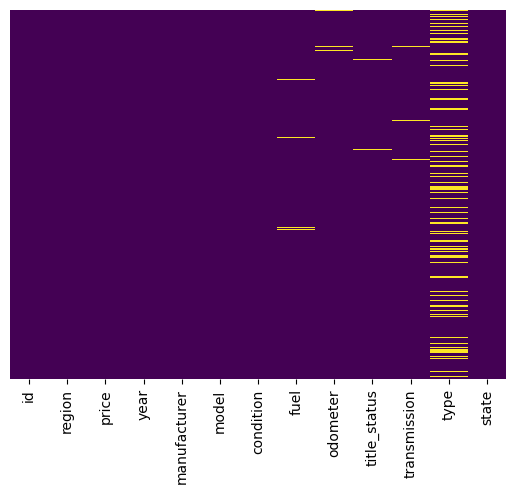

In [51]:
sns.heatmap(clean_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [52]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
#df = pd.read_csv('data/vehicles.csv')
df = clean_data

# Display the original DataFrame with missing values
print("Original DataFrame with missing values:")
print(df.head())

# Identify object columns and convert them to categorical type
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col] = df[col].astype('category')

print("\nDataFrame with object columns converted to categorical type:")
print(df.head())

# Store the original categories
original_categories = {}
for col in object_cols:
    original_categories[col] = df[col].cat.categories

# Encode categorical columns
for col in object_cols:
    df[col] = df[col].cat.codes.replace(-1, np.nan)  # Replace -1 (pandas code for NaN) with np.nan

print("\nDataFrame with encoded categorical columns:")
print(df.head())

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the data
df_imputed = imputer.fit_transform(df)

# Convert the numpy array back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print("\nDataFrame after imputation:")
print(df_imputed.head())

# Convert encoded columns back to their original categories using a safer mapping strategy
for col in object_cols:
    valid_codes = range(len(original_categories[col]))
    df_imputed[col] = df_imputed[col].round().astype(int).map(lambda x: original_categories[col][x] if x in valid_codes else np.nan)

print("\nDataFrame with encoded columns converted back to original categories:")
print(df_imputed.head())


Original DataFrame with missing values:
           id  region  price    year manufacturer                     model  \
0  7316814884  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
1  7316814758  auburn  22590  2010.0    chevrolet            silverado 1500   
2  7316814989  auburn  39590  2020.0    chevrolet       silverado 1500 crew   
3  7316743432  auburn  30990  2017.0       toyota      tundra double cab sr   
4  7316356412  auburn  15000  2013.0         ford                 f-150 xlt   

   condition fuel  odometer title_status transmission    type state  
0       good  gas   57923.0        clean        other  pickup    al  
1       good  gas   71229.0        clean        other  pickup    al  
2       good  gas   19160.0        clean        other  pickup    al  
3       good  gas   41124.0        clean        other  pickup    al  
4  excellent  gas  128000.0        clean    automatic   truck    al  

DataFrame with object columns converted to categorical type:
   

<Axes: >

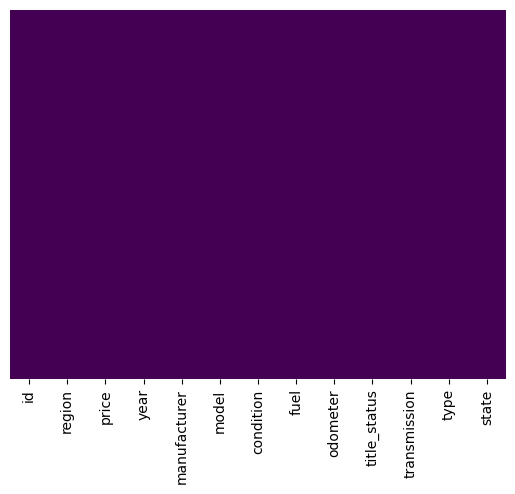

In [53]:
sns.heatmap(df_imputed.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
df_imputed.head(200)

,id,region,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,type,state
0,7.316815e+09,auburn,33590.0,2014.0,gmc,sierra 1500 crew cab slt,good,gas,57923.0,clean,other,pickup,al
1,7.316815e+09,auburn,22590.0,2010.0,chevrolet,silverado 1500,good,gas,71229.0,clean,other,pickup,al
2,7.316815e+09,auburn,39590.0,2020.0,chevrolet,silverado 1500 crew,good,gas,19160.0,clean,other,pickup,al
3,7.316743e+09,auburn,30990.0,2017.0,toyota,tundra double cab sr,good,gas,41124.0,clean,other,pickup,al
4,7.316356e+09,auburn,15000.0,2013.0,ford,f-150 xlt,excellent,gas,128000.0,clean,automatic,truck,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,7.316420e+09,birmingham,12500.0,2008.0,gmc,yukon xl,excellent,gas,177326.0,clean,automatic,SUV,al
196,7.316411e+09,birmingham,15990.0,2017.0,ford,c-max hybrid se wagon 4d,good,hybrid,48195.0,clean,other,wagon,al
197,7.316398e+09,birmingham,2500.0,2008.0,honda,accord,good,gas,204561.0,clean,automatic,sedan,al
198,7.316396e+09,birmingham,20995.0,2011.0,chevrolet,silverado 1500 ltz crew cab 4wd,good,gas,137701.0,clean,automatic,pickup,al


In [56]:
# One-hot encoding for categorical columns
df_imputed = pd.get_dummies(df_imputed, columns=object_cols, drop_first=True)

# Check the resulting DataFrame
print("\nDataFrame after one-hot encoding:")
print(df_imputed.head())

# Check if any object columns are still present and their types
print("\nColumn types after processing:")
print(df_imputed.dtypes)

# Ensure no object columns are present
assert df_imputed.select_dtypes(include='object').empty, "There are still object columns in the DataFrame"



DataFrame after one-hot encoding:
                  id    price    year  odometer  region_abilene  \
276338  7.309497e+09      0.0  2017.0   76482.0           False   
25540   7.315791e+09  11200.0  2013.0  117000.0           False   
207763  7.305715e+09  38615.0  2021.0      11.0           False   
30459   7.313425e+09      0.0  2018.0  110935.0           False   
365998  7.316658e+09   7995.0  2006.0   44872.0           False   

        region_akron / canton  region_albany  region_albuquerque  \
276338                  False          False               False   
25540                   False          False               False   
207763                  False          False               False   
30459                   False          False               False   
365998                  False          False               False   

        region_altoona-johnstown  region_amarillo  ...  state_sd  state_tn  \
276338                     False            False  ...     False     False 

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor

df_imputed = df_imputed.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = df_imputed.drop('price', axis=1)
y = df_imputed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}
# 'XGBoost': XGBRegressor(random_state=42)

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MAE: {mae}, MSE: {mse}, R2: {r2}')


Linear Regression - MAE: 11249.637830263906, MSE: 350035885.47833234, R2: -0.5014420543227893
Decision Tree - MAE: 7652.82, MSE: 223743540.642, R2: 0.040275653897851704
Random Forest - MAE: 6004.3106525, MSE: 112282123.49281284, R2: 0.5183776602493242


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

df_imputed = df_imputed.sample(n=20000, random_state=42)

# Split the data into training and testing sets
X = df_imputed.drop('price', axis=1)
y = df_imputed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42)
}
# 'XGBoost': XGBRegressor(random_state=42)

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MAE: {mae}, MSE: {mse}, R2: {r2}')

# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Model - MAE: {mae}, MSE: {mse}, R2: {r2}')


Random Forest - MAE: 39586.4063575, MSE: 4556042644985.907, R2: -0.0002916358707054645
Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
# Save the model
joblib.dump(best_model, 'best_model.pkl')

# Load the model (for deployment)
loaded_model = joblib.load('best_model.pkl')